## Insight 4
### Desde una perspectiva demográfica ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

### Importing libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing the data

#### Population data

Importing demographic world information from an excel file

In [3]:
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)

In [5]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 0 to 20595
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           20596 non-null  int64  
 1   Variant                                                                                         20596 non-null  object 
 2   Region, subregion, country or area *                                                            20596 non-null  object 
 3   Notes                                                                                           5475 non-null   object 
 4   Location code                                                                                   20596 non-null  int64  
 5   ISO3 Alpha-

we'll select interest columns and then rename them

In [6]:
df_population_limpio = df_population[[
  'Year',
  'ISO2 Alpha-code',
  'Total Population, as of 1 July (thousands)',
  'Male Population, as of 1 July (thousands)',
  'Female Population, as of 1 July (thousands)',
  'Population Density, as of 1 July (persons per square km)',
  'Life Expectancy at Birth, both sexes (years)']].rename(columns = {
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
  }).copy()

we just need check population information between 2020 and 2021 years where lethality rate was upper

In [21]:
inf = df_population_limpio['Year'] >= 2020 
sup = df_population_limpio['Year'] <= 2021
df_population_limpio = df_population_limpio[inf & sup]

In [22]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 70 to 20595
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                572 non-null    float64
 1   Country_code        472 non-null    object 
 2   Total_Population    572 non-null    object 
 3   Male_Population     572 non-null    object 
 4   Female_Population   572 non-null    object 
 5   Population_Density  572 non-null    object 
 6   Life_Expectancy     572 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.8+ KB


Formating data structures

In [23]:
df_population_limpio['Male_Population'] = pd.to_numeric(df_population_limpio['Male_Population'], errors='coerce')
df_population_limpio['Female_Population'] = pd.to_numeric(df_population_limpio['Female_Population'], errors='coerce')
df_population_limpio['Life_Expectancy'] = pd.to_numeric(df_population_limpio['Life_Expectancy'], errors='coerce')

df_population_limpio = df_population_limpio.astype({
  'Year': 'int',
  'Total_Population': 'float',
  'Male_Population': 'float',
  'Female_Population': 'float',
  'Population_Density': 'float',
  'Life_Expectancy': 'float'
})

Checking NaNs values

In [24]:
df_population_limpio.isna().sum()

Year                    0
Country_code          100
Total_Population        0
Male_Population         2
Female_Population       2
Population_Density      0
Life_Expectancy         2
dtype: int64

Droping NaNs values before continue with the data structure formating

In [25]:
df_population_limpio.dropna(inplace=True)

In [26]:
df_population_limpio['Total_Population'] = df_population_limpio['Total_Population'].round(0).astype('int64')
df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'].round(0).astype('int64')
df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'].round(0).astype('int64')
df_population_limpio['Population_Density'] = df_population_limpio['Population_Density'].round(0).astype('int64')
df_population_limpio['Life_Expectancy'] = df_population_limpio['Life_Expectancy'].round(0).astype('int64')

df_population_limpio[['Total_Population','Male_Population','Female_Population']] = df_population_limpio[['Total_Population','Male_Population','Female_Population']]*1000

In [27]:
df_population_limpio.reset_index(inplace=True, drop=True)

In [28]:
df_population_limpio.isna().sum()

Year                  0
Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [29]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                470 non-null    int32 
 1   Country_code        470 non-null    object
 2   Total_Population    470 non-null    int64 
 3   Male_Population     470 non-null    int64 
 4   Female_Population   470 non-null    int64 
 5   Population_Density  470 non-null    int64 
 6   Life_Expectancy     470 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 24.0+ KB


#### Covid data

Importing Covid data

In [13]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')

In [14]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Formating data structures

In [15]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


Filtering by date_reported. We are interested just on that reports between 2020 and 2021 years

In [16]:
df_covid_limpio['Date_reported'].value_counts().sort_index()

Date_reported
2020-01-05    232
2020-01-12    232
2020-01-19    232
2020-01-26    232
2020-02-02    230
             ... 
2023-12-24    232
2023-12-31    232
2024-01-07    232
2024-01-14    232
2024-01-21    232
Name: count, Length: 212, dtype: int64

In [17]:
april20 = df_covid_limpio['Date_reported'] >= "2020-04-01"
jan21 = df_covid_limpio['Date_reported'] <= "2021-01-31"
df_filtrado = df_covid_limpio[april20 & jan21].copy()

In [18]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 13 to 48746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      9949 non-null   datetime64[ns]
 1   Country_code       9949 non-null   object        
 2   Country            9949 non-null   object        
 3   New_cases          9949 non-null   int64         
 4   Cumulative_cases   9949 non-null   int64         
 5   New_deaths         9949 non-null   int64         
 6   Cumulative_deaths  9949 non-null   int64         
 7   lethality_rate     9949 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 699.5+ KB


Grouping by country and calculating lethality rate mean by country

In [19]:
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False).agg({'lethality_rate': 'mean'}).rename(columns={'lethality_rate': 'lethality_rate_mean'})
df_agrupado

,Country_code,Country,lethality_rate_mean
0,AD,Andorra,3.718286
1,AE,United Arab Emirates,0.527090
2,AF,Afghanistan,3.348923
3,AG,Antigua and Barbuda,4.817557
4,AI,Anguilla,0.000000
...,...,...,...
228,YE,Yemen,0.000000
229,YT,Mayotte,1.127901
230,ZA,South Africa,2.563340
231,ZM,Zambia,2.608062


Inner Joinning by country_code between covid and population data

In [30]:
df_final = pd.merge(df_agrupado, df_population_limpio, on="Country_code", how="inner")
df_final

,Country_code,Country,lethality_rate_mean,Year,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,AD,Andorra,3.718286,2020,78000,40000,38000,165,79
1,AD,Andorra,3.718286,2021,79000,40000,39000,168,80
2,AE,United Arab Emirates,0.527090,2020,9287000,6475000,2812000,131,79
3,AE,United Arab Emirates,0.527090,2021,9365000,6512000,2853000,132,79
4,AF,Afghanistan,3.348923,2020,38972000,19692000,19280000,60,63
...,...,...,...,...,...,...,...,...,...
457,ZA,South Africa,2.563340,2021,59392000,28895000,30498000,49,62
458,ZM,Zambia,2.608062,2020,18928000,9339000,9589000,25,62
459,ZM,Zambia,2.608062,2021,19473000,9609000,9864000,26,61
460,ZW,Zimbabwe,2.927274,2020,15670000,7385000,8284000,41,61


Storing Mexico, Argentina and Colombia Data

In [52]:
countries_code = ['MX','AR','CO']

countries = pd.DataFrame(columns=['Country', 'Year', 'lethality_rate_mean', 'Population_Density', 'Female_Population', 'Life_Expectancy'])

for country_code in countries_code:
  country = df_final[df_final['Country_code'] == country_code][['Country', 'Year', 'lethality_rate_mean', 'Population_Density', 'Female_Population', 'Life_Expectancy']]
  countries = pd.concat([countries, country], ignore_index=True)

countries

,Country,Year,lethality_rate_mean,Population_Density,Female_Population,Life_Expectancy
0,Mexico,2020,10.351417,64,64411000,70
1,Mexico,2021,10.351417,65,64849000,70
2,Argentina,2020,4.325120,16,22739000,76
3,Argentina,2021,4.325120,16,22862000,75
4,Colombia,2020,3.176565,45,25791000,75
5,Colombia,2021,3.176565,46,26101000,73


In [68]:
df_final.drop(columns=['Country_code', 'Country'], inplace=True)
df_final

,lethality_rate_mean,Year,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,3.718286,2020,78000,40000,38000,165,79
1,3.718286,2021,79000,40000,39000,168,80
2,0.527090,2020,9287000,6475000,2812000,131,79
3,0.527090,2021,9365000,6512000,2853000,132,79
4,3.348923,2020,38972000,19692000,19280000,60,63
...,...,...,...,...,...,...,...
457,2.563340,2021,59392000,28895000,30498000,49,62
458,2.608062,2020,18928000,9339000,9589000,25,62
459,2.608062,2021,19473000,9609000,9864000,26,61
460,2.927274,2020,15670000,7385000,8284000,41,61


### Feature Importances

In [69]:
x = df_final.drop(['lethality_rate_mean'], axis=1)
y = df_final['lethality_rate_mean']

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model = RandomForestRegressor()
model.fit(x, y)

RandomForestRegressor()

In [72]:
model.feature_importances_

array([0.0060103 , 0.13930683, 0.15269694, 0.22493395, 0.27441396,
       0.20263803])

In [73]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importances

Population_Density    0.274414
Female_Population     0.224934
Life_Expectancy       0.202638
Male_Population       0.152697
Total_Population      0.139307
Year                  0.006010
dtype: float64

In [74]:
ft_imp_barvalues = feature_importances.copy()
for item in ft_imp_barvalues:
  ft_imp_barvalues = ft_imp_barvalues.replace(item, round(item*100,2))
ft_imp_barvalues

Population_Density    27.44
Female_Population     22.49
Life_Expectancy       20.26
Male_Population       15.27
Total_Population      13.93
Year                   0.60
dtype: float64

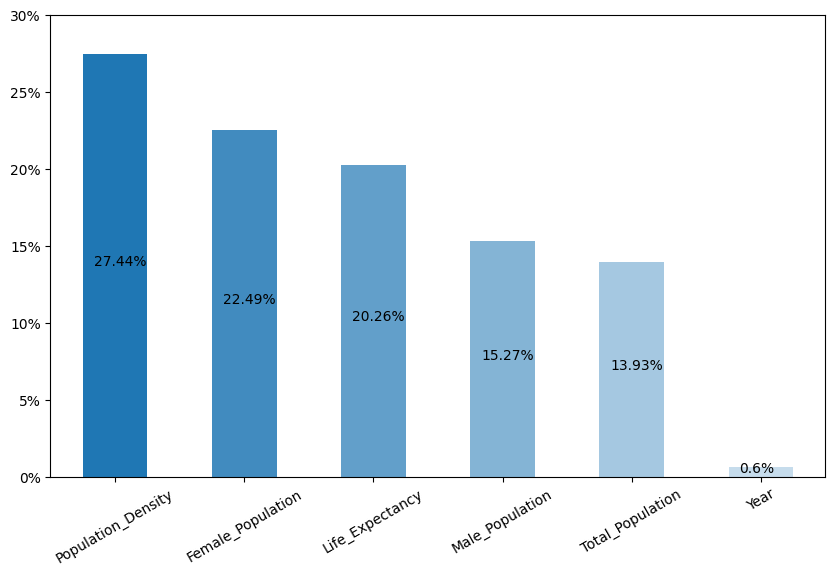

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
ft_imp_barvalues.plot(kind='bar')
ax.set_facecolor("white")
ax.set_ylim(0, 30)
# ax.set_yticklabels()
yticklabels = []
for item in ax.get_yticklabels():
  yticklabels.append(f'{item.get_text()}%')
ax.set_yticklabels(yticklabels)
ax.set_xticklabels(labels=feature_importances.index, rotation=30)
alpha = 1
for bar in ax.patches:
  x = bar.get_x() + bar.get_width()/6
  y = bar.get_height() /2
  value = f'{bar.get_height()}%'
  ax.text(x, y, value)
  bar.set_alpha(alpha)
  alpha = alpha - 0.15
plt.show()

**Conclusión:**

Según nuestro análisis de importancia, la densidad de la población destaca como más influyente, seguida de la población femenina con un 25% y 24% respectivamente.
Esto sugiere que densidad de la población y el número de la población femenina son características relevantes en la incidencia de la letalidad de un país cuando evaluamos el covid-19.

Como vimos el peor momento de estos paises incluido Argentina y Colombia fué comprendido aproximadamente en Abril/20 y Enero/21 en ése periodo el índice de letalidad fué mayor.

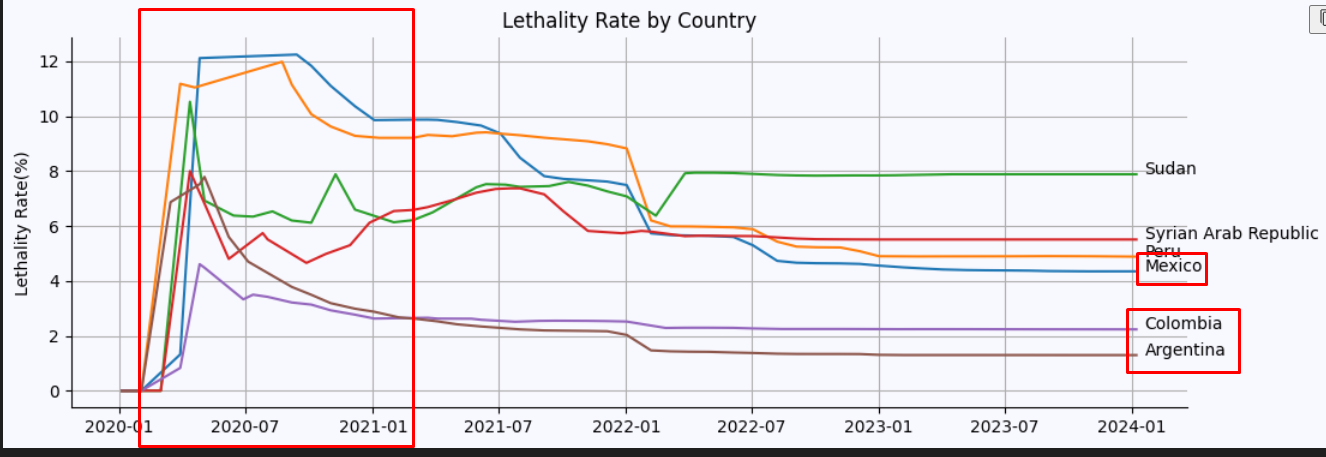

A priori podríamos suponer según nuestro análisis que Mexico contaba con una mayor densidad de población seguidos por Argentina y después Colombia.

Según ésta información... analizaremos la situación de México, Argentina y Colombia.
Con situación nos referimos a analizar el:
- La densidad de la población
- La población femenina
- La expectativa de vida 

Que según vimos en el Ingisht 3, el índice de letalidad fué:<br>
México: > 12%<br>
Argentina: 7,79%<br>
Colombia: 4,61%

Periodo: <br>
Abril/20 ~ Enero/21

## Tratamiento del DF con información del covid

In [76]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


## Tratamiento del DF con información demográfica de los paises

El df_population actual está filtrado del año 2019
tengo que obtener de nuevo df_population y obtener en el periodo de interés que sería en Enero20~Enero21

we just get those interest columns and we will rename those

We will filter by Year, between, 2020 and 2021

In [77]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                470 non-null    int32 
 1   Country_code        470 non-null    object
 2   Total_Population    470 non-null    int64 
 3   Male_Population     470 non-null    int64 
 4   Female_Population   470 non-null    int64 
 5   Population_Density  470 non-null    int64 
 6   Life_Expectancy     470 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 24.0+ KB


Ajustamos las estructuras de datos